In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   #for scaling data
from sklearn.cluster import KMeans #for K-mean Cluster

In [2]:
data=pd.read_csv('C:/Users/Admin/Downloads/17_Dang Pham Huy Hoang_Ch3_Kmeans.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [21]:
df=data[['minimum_nights','price']]
df

,minimum_nights,price
0,1,149
1,1,225
2,3,150
3,1,89
4,10,80
...,...,...
48890,2,70
48891,4,40
48892,10,115
48893,1,55


In [22]:
df.isnull().sum()

minimum_nights    0
price             0
dtype: int64

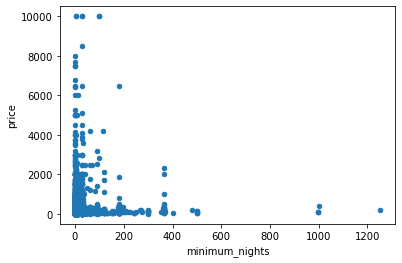

In [23]:
df.plot(kind='scatter', x='minimum_nights', y='price')
plt.show;

In [27]:
sc=StandardScaler() #Chuẩn hóa theo Z-score
df_stand=sc.fit_transform(df)
df_stand

array([[-0.29399621, -0.01549307],
       [-0.29399621,  0.30097355],
       [-0.19648442, -0.01132904],
       ...,
       [ 0.14480686, -0.15707024],
       [-0.29399621, -0.4069123 ],
       [-0.00146083, -0.2611711 ]])

In [28]:
df_stand=pd.DataFrame(df_stand, columns=["minimum_nights","price"])
df_stand

,minimum_nights,price
0,-0.293996,-0.015493
1,-0.293996,0.300974
2,-0.196484,-0.011329
3,-0.293996,-0.265335
4,0.144807,-0.302811
...,...,...
48890,-0.245240,-0.344452
48891,-0.147729,-0.469373
48892,0.144807,-0.157070
48893,-0.293996,-0.406912


In [29]:
df_stand.describe()

,minimum_nights,price
count,4.889500e+04,4.889500e+04
mean,-7.665145e-16,-5.581769e-16
std,1.000010e+00,1.000010e+00
min,-2.939962e-01,-6.359342e-01
25%,-2.939962e-01,-3.486158e-01
50%,-1.964844e-01,-1.945465e-01
75%,-9.897262e-02,9.277183e-02
max,6.060212e+01,4.100441e+01


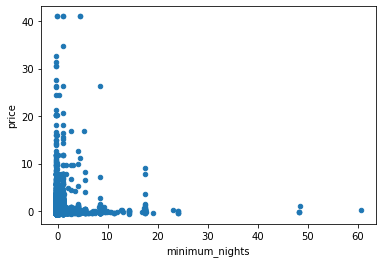

In [30]:
df_stand.plot(kind="scatter",x="minimum_nights",y="price")
plt.show;

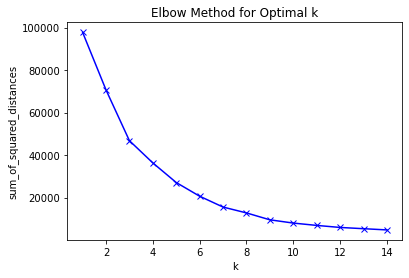

In [31]:
#Sử dụng phương pháp Elbow(khuỷu tay) để tìm ra số cụm tốt nhất
sum_of_squared_distances=[]
K= range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df_stand)
    sum_of_squared_distances.append(km.inertia_)
#Plotting the Elbow Curve by k(number of cluters)
plt.plot(K,sum_of_squared_distances,"bx-")
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [32]:
km5=KMeans(n_clusters=5)
km5=km5.fit(df)
print(km5.labels_) #Cluster

[0 4 0 ... 0 0 0]


In [33]:
labels=km5.labels_
labels=pd.DataFrame(labels,columns=['cluster'])
df_clustered=pd.concat([df,labels],axis=1)
#sorting by cluster
df_clustered.sort_values('cluster',ascending=True)

,minimum_nights,price,cluster
0,1,149,0
29390,3,39,0
29391,3,108,0
29392,1,38,0
29393,2,85,0
...,...,...,...
16517,30,171,4
37756,7,250,4
7383,5,229,4
25658,3,260,4


In [34]:
df_clustered.groupby('cluster').size()

cluster
0    35416
1      103
2     1225
3       18
4    12133
dtype: int64

In [35]:
df_clustered.groupby('cluster').describe()

minimum_nights                                                     \
                 count       mean        std  min  25%  50%   75%     max   
cluster                                                                     
0              35416.0   6.617489  19.169296  1.0  1.0  2.0   5.0   999.0   
1                103.0  23.388350  56.764258  1.0  1.0  2.0  30.0   365.0   
2               1225.0   7.418776  19.412830  1.0  2.0  3.0   5.0   365.0   
3                 18.0  29.500000  48.743325  1.0  1.0  5.0  30.0   180.0   
4              12133.0   8.022501  23.447602  1.0  2.0  3.0   5.0  1250.0   

           price                                                            \
           count         mean          std     min     25%     50%     75%   
cluster                                                                      
0        35416.0    89.201914    36.608913     0.0    60.0    85.0   120.0   
1          103.0  2820.514563   958.972928  1795.0  2000.0  2500.0  3205.0   
2         1225.0   726.188571   260.541996   487.0   505.0   650.0   800.0   
3           18.0  7995.500000  1599.915595  6000.0  6500.0  7601.5  9999.0   
4        12133.0   245.948240    70.682976   168.0   195.0   225.0   285.0   

                  
             max  
cluster           
0          167.0  
1         5250.0  
2         1763.0  
3        10000.0  
4          485.0

In [39]:
#The centroid of cluster
centroid=km5.cluster_centers_
centroid=pd.DataFrame(centroid,columns=['Centroid_nights','Centroid_price'])
centroid
#Tâm(centroid: là tâm trung bình của tất cả các phần tử năm trong cụm)

,Centroid_nights,Centroid_price
0,6.617489,89.201914
1,23.388350,2820.514563
2,7.399351,724.818182
3,29.500000,7995.500000
4,8.024823,245.810242


<AxesSubplot:xlabel='Centroid_nights', ylabel='Centroid_price'>

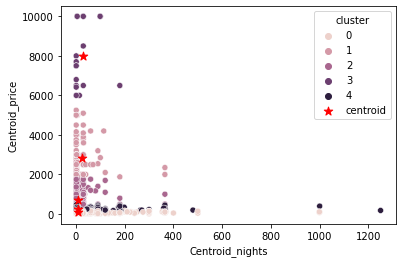

In [46]:
import seaborn as sns
s1=sns.scatterplot(data=df_clustered,x='minimum_nights',y='price',hue='cluster')
centroid.plot(ax=s1,kind='scatter',x='Centroid_nights',y='Centroid_price',color='red',marker='*',s=80,label='centroid',fontsize=10)